 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_dly_rtns_path = Path('Resources/whale_returns.csv')
whale_dly_rtns_df = pd.read_csv(whale_dly_rtns_path)
# Data Frame Preview
whale_dly_rtns_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_dly_rtns_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_dly_rtns_df = whale_dly_rtns_df.dropna().set_index('Date').sort_values(by = 'Date', ascending=True)
# Data Frame Preview
whale_dly_rtns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_dly_rtns_path = Path('Resources/algo_returns.csv')
algo_dly_rtns_df = pd.read_csv(algo_dly_rtns_path)
# Data Frame Preview
algo_dly_rtns_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_dly_rtns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_dly_rtns_df = algo_dly_rtns_df.dropna().set_index('Date').sort_values(by = 'Date', ascending=True)
# Data Frame Preview
algo_dly_rtns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path('Resources/sp500_history.csv')
sp500_history_df = pd.read_csv(sp500_history_path, parse_dates=['Date'])
sp500_history_df = sp500_history_df.set_index('Date').sort_values(by = 'Date', ascending=True)
sp500_history_df.isnull().sum()

Close    0
dtype: int64

In [9]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
counter = 0
for i in sp500_history_df.loc[:,'Close']:
    sp500_history_df.loc[:,'Close'][counter] = float(i.replace('$', ''))
    counter += 1
# Data Frame Preview
sp500_history_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.4
2012-10-05,1460.93


In [11]:
# Calculate Daily Returns
sp500_dly_rtns_df = sp500_history_df.pct_change()
# Data Frame Preview
sp500_dly_rtns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_dly_rtns_df = sp500_dly_rtns_df.dropna()
# Data Frame Preview
sp500_dly_rtns_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_dly_rtns_df = sp500_dly_rtns_df.rename(columns={'Close': 'S&P 500'})
# Data Frame Preview
sp500_dly_rtns_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_dly_rtns_df = whale_dly_rtns_df.join(algo_dly_rtns_df,how='right')
combined_dly_rtns_df = combined_dly_rtns_df.join(sp500_dly_rtns_df,how='right')
combined_dly_rtns_df = combined_dly_rtns_df.dropna()
# Data Frame Preview
combined_dly_rtns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

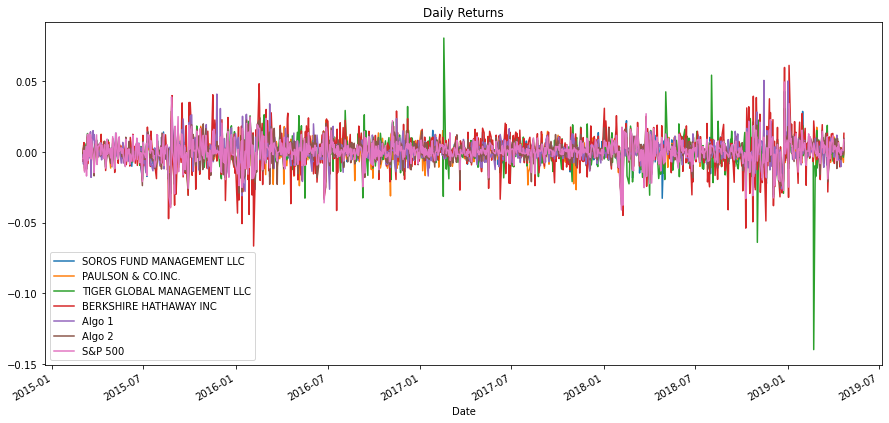

In [15]:
# Plot daily returns of all portfolios
combined_dly_rtns_df.plot(figsize = (15,7), title = 'Daily Returns')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

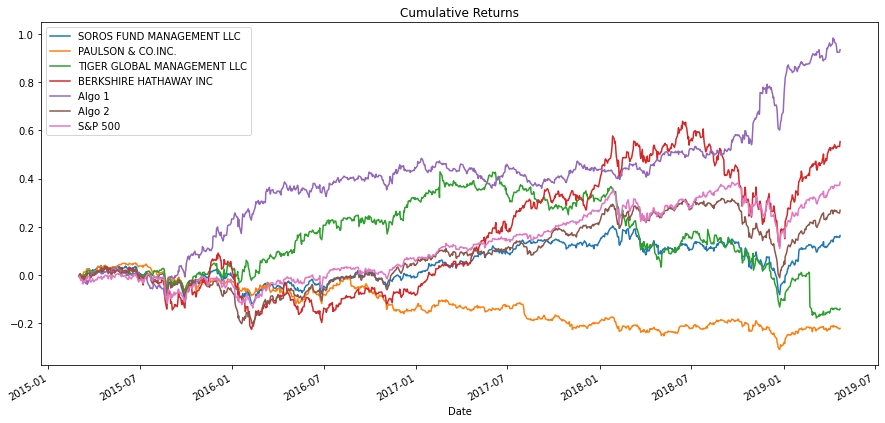

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_dly_rtns_df).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(15,7), title='Cumulative Returns')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Box Plot'}>

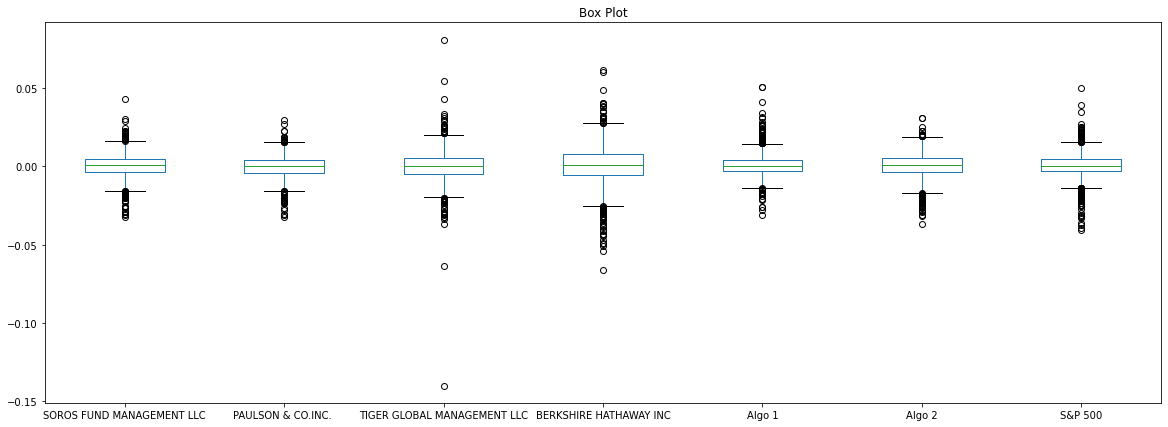

In [17]:
# Box plot to visually show risk
combined_dly_rtns_df.plot.box(figsize=(20,7), title = 'Box Plot')

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_standard = combined_dly_rtns_df.std()

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_standard = daily_standard['S&P 500']
counter = 0
# Determine which portfolios are riskier than the S&P 500
print(f'S&P 500\'s daily standard deviation is {sp500_daily_standard}.')
print('-'*30)
for i in daily_standard:
    if i > sp500_daily_standard:
        ticker = daily_standard.index[counter]
        value = i
        print(f'{ticker}\'s daily standard deviation is {value} and greater than S&P 500\'s daily standard deviation. Therefore deemed riskier than S&P 500.')    
        print('-'*30)
    counter+=1

S&P 500's daily standard deviation is 0.008553731597758204.
------------------------------
TIGER GLOBAL MANAGEMENT LLC's daily standard deviation is 0.010893969618743032 and greater than S&P 500's daily standard deviation. Therefore deemed riskier than S&P 500.
------------------------------
BERKSHIRE HATHAWAY INC's daily standard deviation is 0.012918618441883524 and greater than S&P 500's daily standard deviation. Therefore deemed riskier than S&P 500.
------------------------------


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
volatility = combined_dly_rtns_df.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation'}, xlabel='Date'>

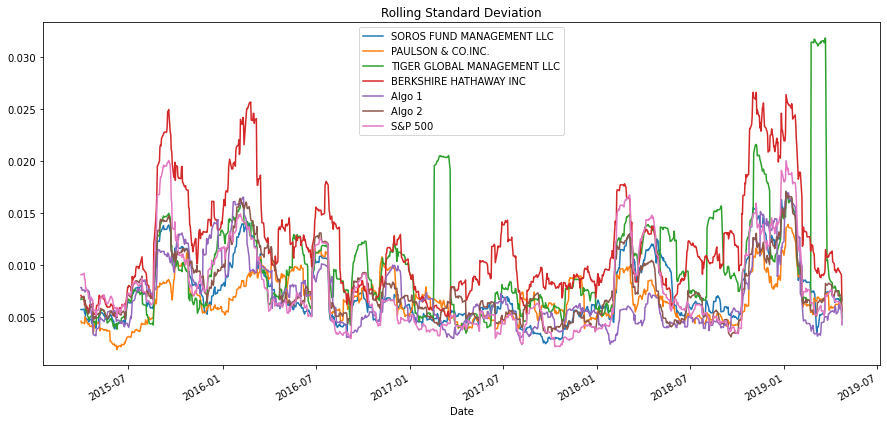

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_dly_rtns_21 = combined_dly_rtns_df.rolling(window=21).std()
combined_dly_rtns_21 = combined_dly_rtns_21.dropna()
# Plot the rolling standard deviation
combined_dly_rtns_21.plot(figsize=(15,7), title='Rolling Standard Deviation')

### Calculate and plot the correlation

<AxesSubplot:>

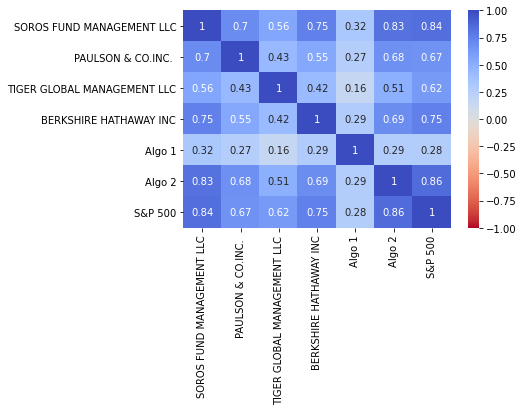

In [22]:
# Calculate the correlation
correlation = combined_dly_rtns_df.corr()
# Display de correlation matrix

cmap = sns.color_palette("coolwarm_r", as_cmap=True)
sns.heatmap(correlation, cmap = cmap, vmin = -1, vmax = 1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of TIGER GLOBAL MANAGEMENT LLC and S&P 500'}, xlabel='Date'>

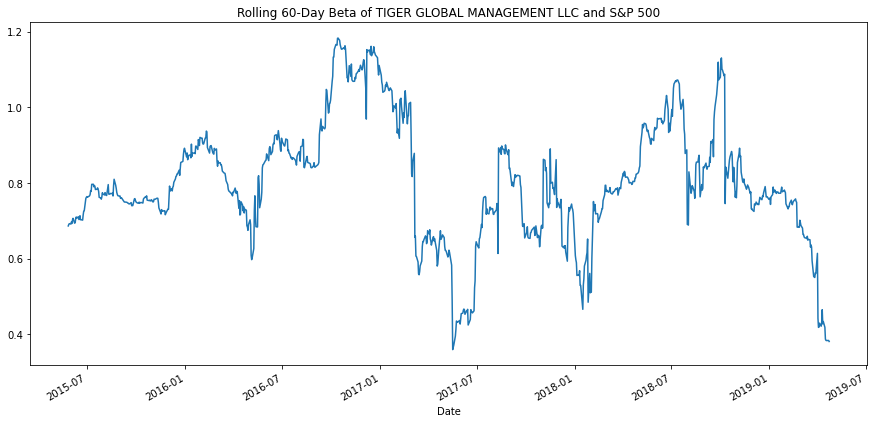

In [23]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_dly_rtns_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(combined_dly_rtns_df['S&P 500'])

# Calculate variance of S&P 500
rolling_variance = combined_dly_rtns_df['S&P 500'].rolling(window=60).var()

# Computing beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
rolling_beta.plot(figsize=(15, 7), title='Rolling 60-Day Beta of TIGER GLOBAL MANAGEMENT LLC and S&P 500')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Rolling 21-Day Exponentially Weighted Moving Average.'}, xlabel='Date'>

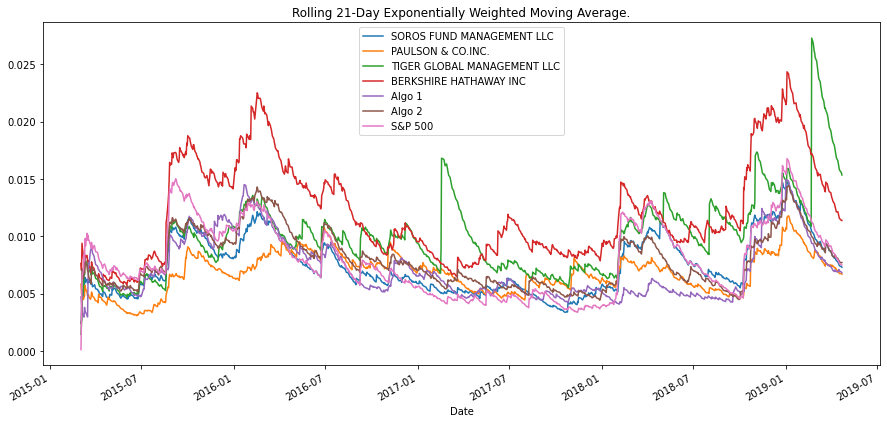

In [24]:
# Use `ewm` to calculate the rolling window
combined_dly_rtns_ewm_21 = combined_dly_rtns_df.ewm(halflife=21).std()
combined_dly_rtns_ewm_21 = combined_dly_rtns_ewm_21.dropna()

# Plot the rolling standard deviation
combined_dly_rtns_ewm_21.plot(figsize=(15,7), title='Rolling 21-Day Exponentially Weighted Moving Average.')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_dly_rtns_df.mean() * 252) / (combined_dly_rtns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':"Combined Portfolio's Sharpe Ratios"}>

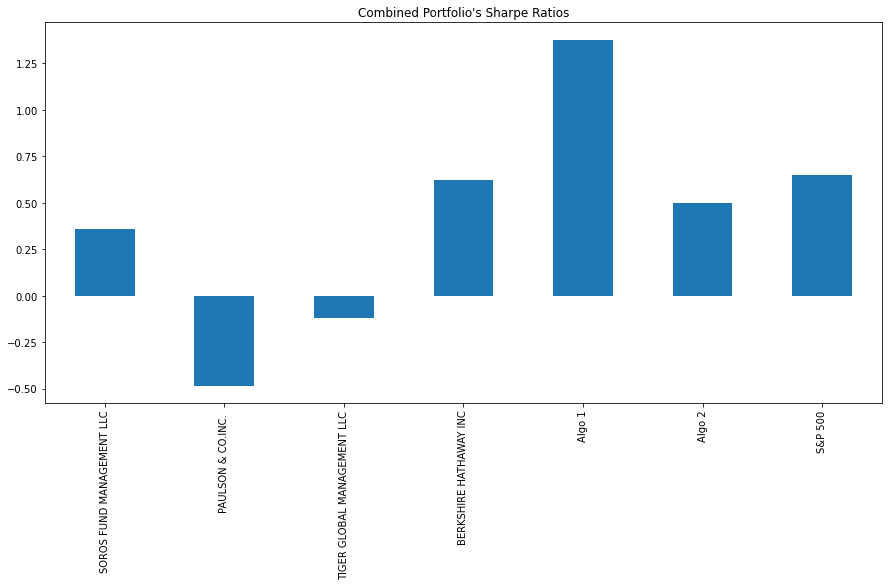

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(figsize=(15,7), kind="bar", title="Combined Portfolio's Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [27]:
# Reading data from 1st stock
# Reorganize portfolio data by having a column per symbol
# Reset Date index
aapl_hist_path = Path('Resources/aapl_historical.csv')
aapl_hist_df = pd.read_csv(aapl_hist_path).set_index('Trade DATE')
aapl_hist_df = aapl_hist_df.rename(columns = {'NOCP':'AAPL'})
aapl_hist_df = aapl_hist_df.drop(columns='Symbol')

In [28]:
# Reading data from 2nd stock
# Reorganize portfolio data by having a column per symbol
# Reset Date index
cost_hist_path = Path('Resources/cost_historical.csv')
cost_hist_df = pd.read_csv(cost_hist_path).set_index('Trade DATE')
cost_hist_df = cost_hist_df.rename(columns = {'NOCP':'COST'})
cost_hist_df = cost_hist_df.drop(columns='Symbol')

In [29]:
# Reading data from 3rd stock
# Reorganize portfolio data by having a column per symbol
# Reset Date index
goog_hist_path = Path('Resources/goog_historical.csv')
goog_hist_df = pd.read_csv(goog_hist_path).set_index('Trade DATE')
goog_hist_df = goog_hist_df.rename(columns = {'NOCP':'GOOG'})
goog_hist_df = goog_hist_df.drop(columns='Symbol')

In [30]:
# Combine all stocks in a single DataFrame
stocks_df = pd.concat([aapl_hist_df,cost_hist_df,goog_hist_df], axis = 1)

In [31]:
stocks_df.head()

,AAPL,COST,GOOG
Trade DATE,,,
5/9/2019,200.72,243.47,1162.38
5/8/2019,202.90,241.34,1166.27
5/7/2019,202.86,240.18,1174.10
5/6/2019,208.48,244.23,1189.39
5/3/2019,211.75,244.62,1185.40


In [32]:
# Calculate daily returns
# Drop NAs
dly_rtns_cust = stocks_df.pct_change().dropna()

# Display sample data
dly_rtns_cust.head()

,AAPL,COST,GOOG
Trade DATE,,,
5/8/2019,0.010861,-0.008749,0.003347
5/7/2019,-0.000197,-0.004806,0.006714
5/6/2019,0.027704,0.016862,0.013023
5/3/2019,0.015685,0.001597,-0.003355
5/2/2019,-0.012279,-0.007890,-0.019226


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Set weights
weights = [1/3, 1/3, 1/3]
port_rtns = pd.DataFrame()
# Calculate portfolio return
port_rtns['Custom Returns'] = dly_rtns_cust.dot(weights)
# Display sample data
port_rtns.head()

,Custom Returns
Trade DATE,
5/8/2019,0.001820
5/7/2019,0.000570
5/6/2019,0.019196
5/3/2019,0.004642
5/2/2019,-0.013131


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
# Join your returns DataFrame to the original returns DataFrame
stocks_rtns_df = pd.concat([stocks_df,port_rtns], axis = 1)

# Only compare dates where return data exists for all the stocks (drop NaNs)
stocks_rtns_df = stocks_rtns_df.dropna()
# Rename column 
stocks_rtns_df = stocks_rtns_df.rename(columns = {0:'Returns'})

In [35]:
stocks_rtns_df.head()

,AAPL,COST,GOOG,Custom Returns
5/8/2019,202.90,241.34,1166.27,0.001820
5/7/2019,202.86,240.18,1174.10,0.000570
5/6/2019,208.48,244.23,1189.39,0.019196
5/3/2019,211.75,244.62,1185.40,0.004642
5/2/2019,209.15,242.69,1162.61,-0.013131


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized `std`
volatility = dly_rtns_cust.std() * np.sqrt(252)
volatility

AAPL    0.300387
COST    0.213344
GOOG    0.265322
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Trade DATE'>

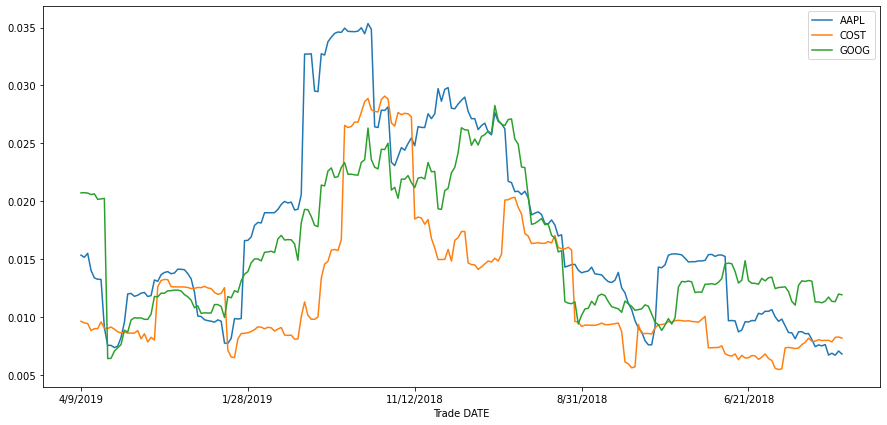

In [37]:
# Calculate the rolling standard deviation
roll_dly_std_21 = dly_rtns_cust.rolling(window=21).std()
roll_dly_std_21 = roll_dly_std_21.dropna()

# Plot the rolling standard deviation
roll_dly_std_21.plot(figsize=(15,7))

### Calculate and plot the correlation

<AxesSubplot:>

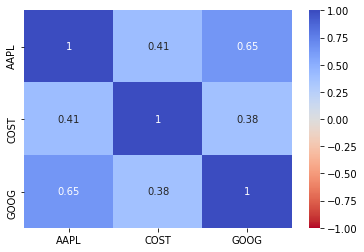

In [38]:
# Calculate and plot the correlation
# Calculate the correlation
correlation = dly_rtns_cust.corr()

# Display de correlation matrix

cmap = sns.color_palette("coolwarm_r", as_cmap=True)
sns.heatmap(correlation, cmap = cmap, vmin = -1, vmax = 1, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Custom Portfolio and S&P 500'}>

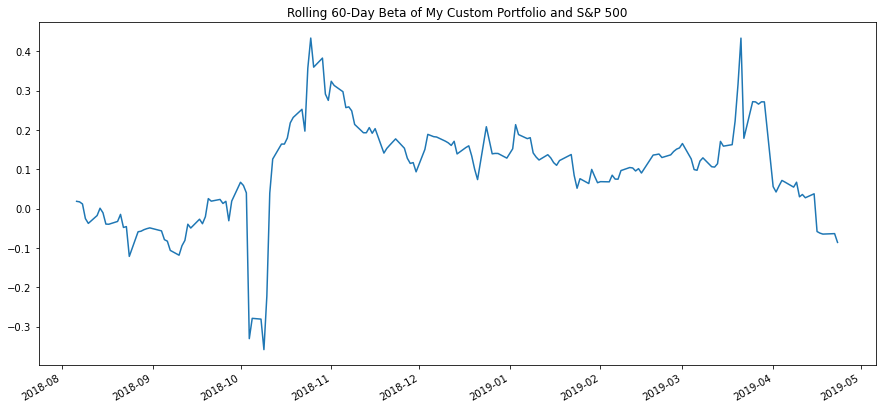

In [39]:
# Calculate covariance of a single portfolio
rolling_covariance = port_rtns['Custom Returns'].rolling(window=60).cov(combined_dly_rtns_df['S&P 500'])

# Calculate variance of S&P 500
rolling_variance = combined_dly_rtns_df['S&P 500'].rolling(window=60).var()

# Computing beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
rolling_beta.plot(figsize=(15, 7), title='Rolling 60-Day Beta of My Custom Portfolio and S&P 500')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (dly_rtns_cust.mean() * 252) / (dly_rtns_cust.std() * np.sqrt(252))
sharpe_ratios

AAPL   -0.061751
COST   -0.929405
GOOG   -0.084987
dtype: float64

<AxesSubplot:title={'center':"Combined Portfolio's Sharpe Ratios"}>

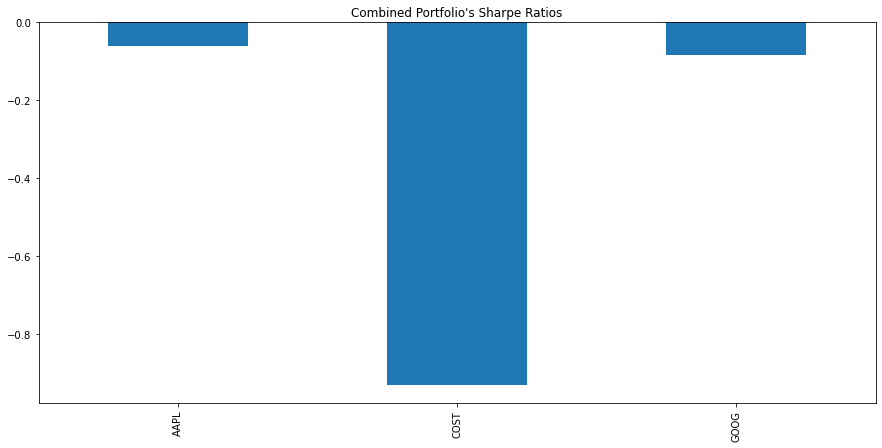

In [41]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(figsize=(15,7), kind="bar", title="Combined Portfolio's Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [42]:
print('My portfolio did poorly.')

My portfolio did poorly.
